In [6]:
#       CODE FOR "PORTFOLIO OPTIMISATION" - SUBMITTED BY NIMISH AGARWAL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as dr
from datetime import datetime
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Web Scapping Stocks Data
companies = ['goog','mo','dal','fb','vedl']
#,'amzn','aapl','t','aa','axp','DB','AEM','APD','AMBA','NVS','ANF','LULU']
start = datetime(2016, 1, 1)
end = datetime(2019, 5, 1)

df = dr.data.get_data_yahoo(companies, start, end, interval='m')

# Getting Returns
data = df[['Adj Close']]
log_data = np.log(data)
df = log_data['Adj Close'].diff()
ndata = 100*df
ndata = ndata.dropna()

# Saving Scapped Data
ndata.to_csv('stocks.csv')

In [78]:
df = pd.read_csv('../Final Project/predicted_stocks.csv')
# df = pd.read_csv('stocks.csv')

df = df.iloc[:, 0:5]
df.head()

,Months,0,1,2,3
0,2016-01-31,-0.91,-2.10,0.82,1.14
1,2016-02-29,1.24,1.37,2.60,-4.00
2,2016-03-31,-1.71,-1.47,-1.23,-1.59
3,2016-04-30,4.42,-5.00,1.71,3.80
4,2016-05-31,0.59,0.19,3.60,1.07


In [79]:
# Statistical Properties of stocks

mean_return = df.mean(axis=0)  # Stocks Return
std_dev = df.std(axis=0)  # Stocks Risk (Standard Deviation)
cov_matrix = np.matrix(df.cov())  # Stocks Covariance Matrix
corr_matrix = df.corr()  # Stocks Correlation Matrix


In [80]:
import random  # For generating weights

ports = 5000  # Count of Total Portfolios
(m, n) = df.shape

portfolios = []  # Set of Portfolios
all_weights = []  # Set of Portfolio Weights

for i in range(1, ports):
#    Generating Weights
    w = [np.sqrt(random.random()*random.random())*(random.random()*50) 
         for i in range(1,n)]
    s = sum(w)
    weight = [ i/s for i in w ]
    all_weights.append(weight)
#     Portfolio Properties
    portfolio_return = np.dot(weight, mean_return)
    variance = np.matmul(np.matmul(weight, cov_matrix), np.transpose(weight))
    portfolio_std_dev = np.sqrt(variance[0,0])
    sharpe_ratio = portfolio_return / portfolio_std_dev  # Assuming Rf=0
#     Add Portfolio to the list
    portfolios.append((portfolio_return, portfolio_std_dev, sharpe_ratio))
    
portfolios = pd.DataFrame(portfolios, 
                          columns=['Return', 'Std. Dev.', 'Sharpe Ratio'])

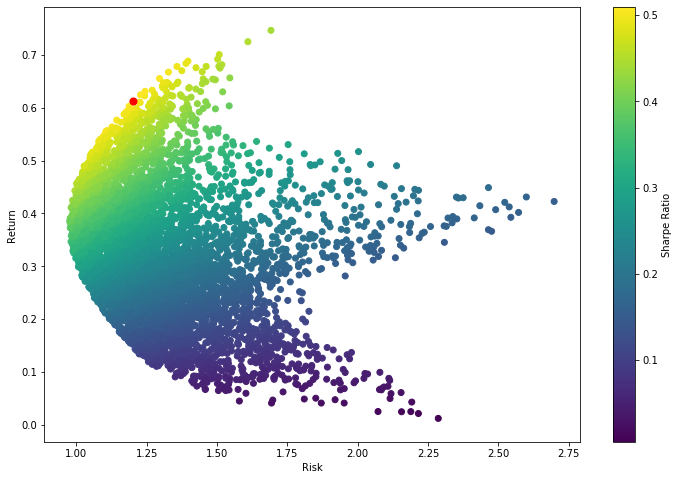

In [81]:
# Plot Portfolios
plt.figure(figsize=(12,8))
plt.scatter(portfolios.iloc[:,1], portfolios.iloc[:,0],
            c=portfolios.iloc[:,2], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')

# Find Point with Maximum sharpe Ratio
idx = np.argmax(portfolios.iloc[:,2])
plt.scatter(portfolios.iloc[idx, 1], portfolios.iloc[idx, 0], c='red', s=50) # Plotting the point (red dot)

plt.show()

In [82]:
# Return Weights with Max Sharpe Ratio
opt_weight = all_weights[idx]
opt_weight

[0.10845756978933271,
 0.007294433145013462,
 0.6439416901657676,
 0.24030630689988622]